In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# خواندن داده‌ها از فایل CSV
data = pd.read_csv('modified-dataset.csv')
data.head()


school sex   age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F  18.0       U     GT3       A   4.0   4.0  at_home   teacher   
1     GP   F  17.0       U     GT3       T   1.0   1.0  at_home     other   
2     GP   F  15.0       U     LE3       T   1.0   1.0  at_home     other   
3     GP   F  15.0       U     GT3       T   4.0   2.0   health  services   
4     GP   F  16.0       U     GT3       T   3.0   3.0    other     other   

   ... feespaid  ecactivities  internet  freetime goout health absences    G1  \
0  ...       no            no        no       3.0   4.0    3.0      6.0   5.0   
1  ...       no            no       yes       3.0   3.0    3.0      4.0   5.0   
2  ...      yes            no       yes       3.0   2.0    3.0     10.0   7.0   
3  ...      yes           yes       yes       2.0   2.0    5.0      2.0  15.0   
4  ...      yes            no        no       NaN   2.0    5.0      4.0   6.0   

     G2    G3  
0   NaN   6.0  
1   5.0   6.0  
2   8.0  10.0  
3  14.0  15.0  
4  10.0  10.0  

[5 rows x 26 columns]

In [153]:
data.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  389.000000  392.000000  387.000000  392.000000  387.000000  387.000000   
mean    16.694087    2.755102    2.527132    1.448980    2.033592    0.338501   
std      1.270803    1.094616    1.085067    0.698884    0.840311    0.749190   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

         freetime       goout      health    absences          G1          G2  \
count  386.000000  383.000000  387.000000  386.000000  390.000000  384.000000   
mean     3.233161    3.127937    3.550388    5.746114   10.876923   10.703125   
std      1.000020    1.117133    1.389978    8.038724    3.319372    3.747290   
min      1.000000    1.000000    1.000000    0.000000    3.000000    0.000000   
25%      3.000000    2.000000    3.000000    0.000000    8.000000    9.000000   
50%      3.000000    3.000000    4.000000    4.000000   11.000000   11.000000   
75%      4.000000    4.000000    5.000000    8.000000   13.000000   13.000000   
max      5.000000    5.000000    5.000000   75.000000   19.000000   19.000000   

               G3  
count  388.000000  
mean    10.425258  
std      4.573498  
min      0.000000  
25%      8.000000  
50%     11.000000  
75%     14.000000  
max     20.000000

In [154]:
data.isnull().sum()

school           7
sex              6
age              6
address         10
famsize          8
Pstatus          8
Medu             3
Fedu             8
Mjob             8
Fjob             8
guardian        12
traveltime       3
studytime        8
failures         8
Ssupport         7
Gsupport         5
feespaid        12
ecactivities     8
internet         9
freetime         9
goout           12
health           8
absences         9
G1               5
G2              11
G3               7
dtype: int64

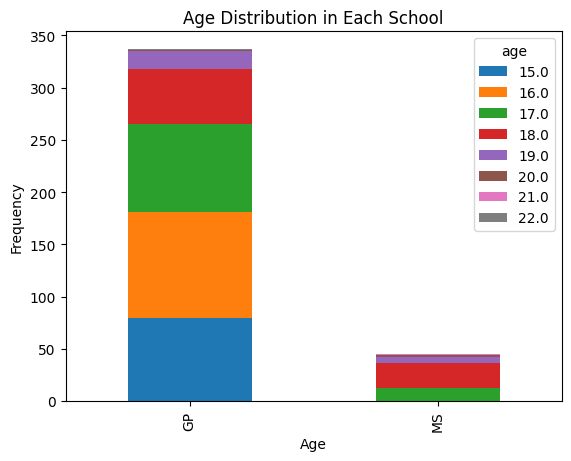

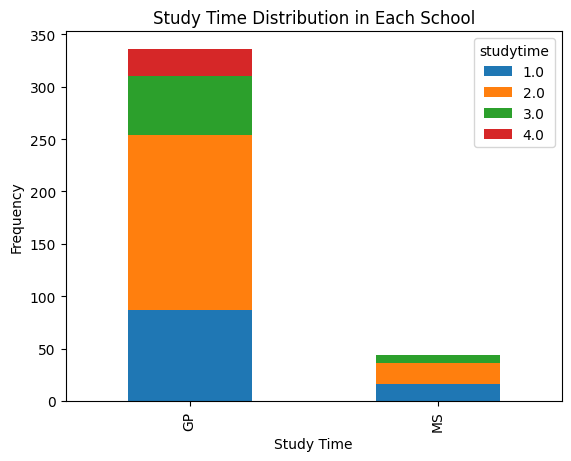

In [155]:
# تقسیم داده‌ها بر اساس مدرسه
school_data = data.groupby('school')

# محاسبه توزیع فراوانی سن و زمان مطالعه در هر مدرسه
age_distribution = school_data['age'].value_counts().unstack(fill_value=0)
studytime_distribution = school_data['studytime'].value_counts().unstack(fill_value=0)

# رسم نمودار میله‌ای توزیع فراوانی سن در هر مدرسه
age_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution in Each School')
# رسم نمودار میله‌ای توزیع فراوانی زمان مطالعه در هر مدرسه
studytime_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Study Time')
plt.ylabel('Frequency')
plt.title('Study Time Distribution in Each School')
# نمایش نمودارها
plt.show()

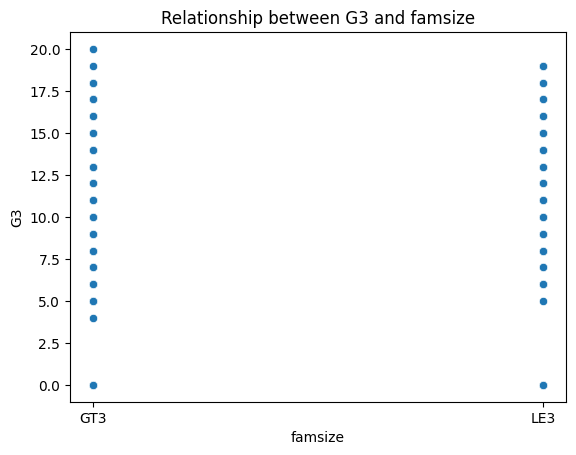

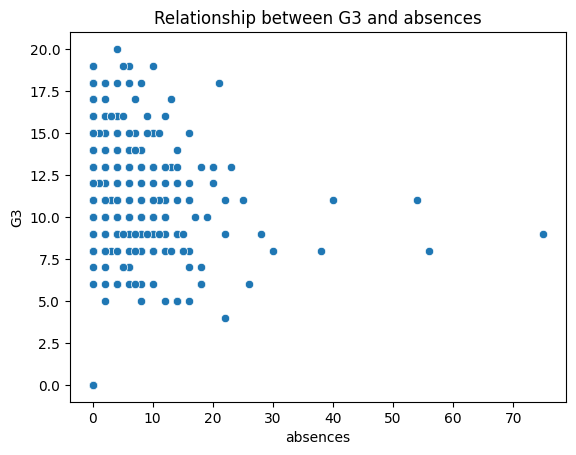

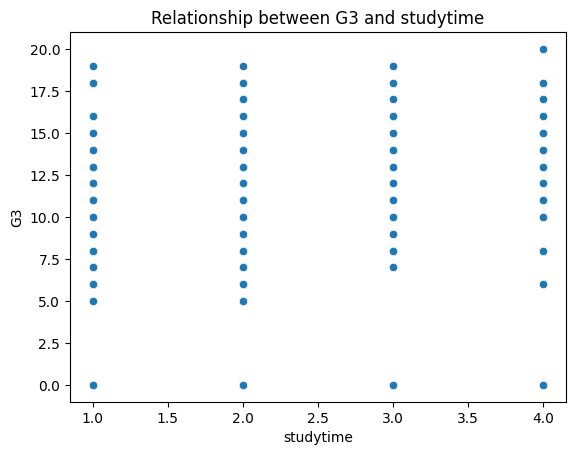

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# رسم نمودار رنگ آمیزی شده
sns.scatterplot(data=data, x='famsize', y='G3')
plt.title('Relationship between G3 and famsize')
plt.show()

sns.scatterplot(data=data, x='absences', y='G3')
plt.title('Relationship between G3 and absences')
plt.show()

sns.scatterplot(data=data, x='studytime', y='G3')
plt.title('Relationship between G3 and studytime')
plt.show()

## Feature Engineering


In [157]:
#school
sch_map = {'GP':1, 'MS':2}
data['school'] = data['school'].map(sch_map)

In [158]:
#sex
sex_map = {'F':1, 'M':2}
data['sex'] = data['sex'].map(sex_map)

In [159]:
#address
fmap = {'U':1, 'R':2}
data['address'] = data['address'].map(fmap)

In [160]:
#famsize
fmap = {'LE3':1, 'GT3':2}
data['famsize'] = data['famsize'].map(fmap)

In [161]:
#Pstatus
fmap = {'T':1, 'A':2}
data['Pstatus'] = data['Pstatus'].map(fmap)

In [162]:
#Mjob and Fjob
fmap = {'services':1, 'at_home':2, 'teacher':3, 'health':4, 'other':5}
data['Mjob'] = data['Mjob'].map(fmap)
data['Fjob'] = data['Fjob'].map(fmap)

In [163]:
#guardian
fmap = {'mother':1, 'father':2, 'other':3}
data['guardian'] = data['guardian'].map(fmap)

In [164]:
fmap = {'yes':1, 'no':0}
data['ecactivities'] = data['ecactivities'].map(fmap)
data['feespaid'] = data['feespaid'].map(fmap)
data['Ssupport'] = data['Ssupport'].map(fmap)
data['Gsupport'] = data['Gsupport'].map(fmap)
data['internet'] = data['internet'].map(fmap)

data.head(20)

school  sex   age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0      1.0  1.0  18.0      1.0      2.0      2.0   4.0   4.0   2.0   3.0  ...   
1      1.0  1.0  17.0      1.0      2.0      1.0   1.0   1.0   2.0   5.0  ...   
2      1.0  1.0  15.0      1.0      1.0      1.0   1.0   1.0   2.0   5.0  ...   
3      1.0  1.0  15.0      1.0      2.0      1.0   4.0   2.0   4.0   1.0  ...   
4      1.0  1.0  16.0      1.0      2.0      1.0   3.0   3.0   5.0   5.0  ...   
5      1.0  2.0  16.0      1.0      1.0      1.0   4.0   NaN   1.0   5.0  ...   
6      1.0  2.0  16.0      1.0      1.0      1.0   2.0   2.0   5.0   5.0  ...   
7      1.0  1.0  17.0      1.0      2.0      2.0   4.0   4.0   5.0   3.0  ...   
8      1.0  2.0  15.0      1.0      1.0      2.0   3.0   2.0   1.0   5.0  ...   
9      1.0  2.0  15.0      1.0      2.0      1.0   3.0   4.0   5.0   5.0  ...   
10     1.0  1.0  15.0      1.0      2.0      1.0   4.0   4.0   3.0   4.0  ...   
11     1.0  1.0  15.0      1.0      2.0      1.0   2.0   1.0   1.0   5.0  ...   
12     1.0  2.0  15.0      1.0      1.0      1.0   4.0   4.0   NaN   1.0  ...   
13     1.0  2.0  15.0      1.0      2.0      1.0   4.0   3.0   3.0   5.0  ...   
14     1.0  2.0  15.0      1.0      2.0      2.0   2.0   2.0   5.0   5.0  ...   
15     1.0  1.0  16.0      1.0      2.0      1.0   4.0   4.0   4.0   5.0  ...   
16     1.0  1.0  16.0      1.0      2.0      1.0   4.0   NaN   1.0   1.0  ...   
17     1.0  1.0  16.0      1.0      2.0      1.0   3.0   3.0   5.0   5.0  ...   
18     1.0  2.0  17.0      1.0      2.0      1.0   3.0   2.0   1.0   1.0  ...   
19     1.0  2.0  16.0      1.0      1.0      1.0   4.0   3.0   4.0   5.0  ...   

    feespaid  ecactivities  internet  freetime  goout  health  absences    G1  \
0        0.0           0.0       0.0       3.0    4.0     3.0       6.0   5.0   
1        0.0           0.0       1.0       3.0    3.0     3.0       4.0   5.0   
2        1.0           0.0       1.0       3.0    2.0     3.0      10.0   7.0   
3        1.0           1.0       1.0       2.0    2.0     5.0       2.0  15.0   
4        1.0           0.0       0.0       NaN    2.0     5.0       4.0   6.0   
5        1.0           1.0       NaN       4.0    2.0     5.0      10.0  15.0   
6        0.0           0.0       1.0       4.0    4.0     3.0       0.0  12.0   
7        0.0           0.0       0.0       1.0    4.0     1.0       NaN   6.0   
8        1.0           0.0       1.0       2.0    2.0     1.0       0.0  16.0   
9        1.0           1.0       1.0       5.0    1.0     5.0       0.0  14.0   
10       1.0           0.0       1.0       3.0    3.0     2.0       0.0  10.0   
11       0.0           1.0       1.0       2.0    2.0     4.0       4.0  10.0   
12       1.0           1.0       1.0       3.0    3.0     5.0       2.0  14.0   
13       NaN           0.0       1.0       4.0    3.0     3.0       2.0  10.0   
14       0.0           0.0       1.0       5.0    2.0     3.0       0.0  14.0   
15       0.0           0.0       1.0       4.0    4.0     2.0       4.0  14.0   
16       1.0           1.0       1.0       2.0    3.0     2.0       6.0  13.0   
17       0.0           1.0       0.0       NaN    2.0     4.0       4.0   8.0   
18       0.0           1.0       1.0       5.0    5.0     NaN      16.0   6.0   
19       NaN           1.0       1.0       1.0    3.0     5.0       4.0   8.0   

      G2    G3  
0    NaN   6.0  
1    5.0   6.0  
2    8.0  10.0  
3   14.0  15.0  
4   10.0  10.0  
5   15.0  15.0  
6   12.0  11.0  
7    5.0   6.0  
8    NaN  19.0  
9   15.0  15.0  
10   8.0   9.0  
11  12.0  12.0  
12  14.0  14.0  
13  10.0  11.0  
14  16.0  16.0  
15  14.0  14.0  
16  14.0  14.0  
17  10.0  10.0  
18   5.0   5.0  
19  10.0  10.0  

[20 rows x 26 columns]

## First Feature Selection with Correlation

In [165]:
data = data.drop(dict(data.corr()['G3'][0:6]).keys(),axis=1)
data.head(20)

Medu  Fedu  Mjob  Fjob  guardian  traveltime  studytime  failures  \
0    4.0   4.0   2.0   3.0       1.0         2.0        2.0       0.0   
1    1.0   1.0   2.0   5.0       2.0         1.0        2.0       0.0   
2    1.0   1.0   2.0   5.0       1.0         1.0        2.0       3.0   
3    4.0   2.0   4.0   1.0       1.0         1.0        3.0       0.0   
4    3.0   3.0   5.0   5.0       2.0         1.0        2.0       0.0   
5    4.0   NaN   1.0   5.0       1.0         1.0        NaN       0.0   
6    2.0   2.0   5.0   5.0       1.0         1.0        2.0       0.0   
7    4.0   4.0   5.0   3.0       1.0         2.0        2.0       0.0   
8    3.0   2.0   1.0   5.0       1.0         1.0        2.0       0.0   
9    3.0   4.0   5.0   5.0       1.0         1.0        2.0       0.0   
10   4.0   4.0   3.0   4.0       1.0         1.0        2.0       0.0   
11   2.0   1.0   1.0   5.0       2.0         3.0        3.0       0.0   
12   4.0   4.0   NaN   1.0       2.0         1.0        1.0       0.0   
13   4.0   3.0   3.0   5.0       1.0         2.0        2.0       0.0   
14   2.0   2.0   5.0   5.0       3.0         1.0        3.0       0.0   
15   4.0   4.0   4.0   5.0       1.0         1.0        1.0       0.0   
16   4.0   NaN   1.0   1.0       1.0         1.0        3.0       0.0   
17   3.0   3.0   5.0   5.0       1.0         3.0        2.0       0.0   
18   3.0   2.0   1.0   1.0       1.0         1.0        1.0       3.0   
19   4.0   3.0   4.0   5.0       2.0         1.0        1.0       0.0   

    Ssupport  Gsupport  feespaid  ecactivities  internet  freetime  goout  \
0        1.0       0.0       0.0           0.0       0.0       3.0    4.0   
1        0.0       1.0       0.0           0.0       1.0       3.0    3.0   
2        1.0       0.0       1.0           0.0       1.0       3.0    2.0   
3        0.0       1.0       1.0           1.0       1.0       2.0    2.0   
4        0.0       1.0       1.0           0.0       0.0       NaN    2.0   
5        0.0       1.0       1.0           1.0       NaN       4.0    2.0   
6        0.0       0.0       0.0           0.0       1.0       4.0    4.0   
7        1.0       1.0       0.0           0.0       0.0       1.0    4.0   
8        0.0       1.0       1.0           0.0       1.0       2.0    2.0   
9        0.0       1.0       1.0           1.0       1.0       5.0    1.0   
10       0.0       1.0       1.0           0.0       1.0       3.0    3.0   
11       0.0       1.0       0.0           1.0       1.0       2.0    2.0   
12       0.0       NaN       1.0           1.0       1.0       3.0    3.0   
13       0.0       1.0       NaN           0.0       1.0       4.0    3.0   
14       0.0       1.0       0.0           0.0       1.0       5.0    2.0   
15       0.0       1.0       0.0           0.0       1.0       4.0    4.0   
16       0.0       1.0       1.0           1.0       1.0       2.0    3.0   
17       1.0       1.0       0.0           1.0       0.0       NaN    2.0   
18       0.0       1.0       0.0           1.0       1.0       5.0    5.0   
19       0.0       0.0       NaN           1.0       1.0       1.0    3.0   

    health  absences    G1    G2    G3  
0      3.0       6.0   5.0   NaN   6.0  
1      3.0       4.0   5.0   5.0   6.0  
2      3.0      10.0   7.0   8.0  10.0  
3      5.0       2.0  15.0  14.0  15.0  
4      5.0       4.0   6.0  10.0  10.0  
5      5.0      10.0  15.0  15.0  15.0  
6      3.0       0.0  12.0  12.0  11.0  
7      1.0       NaN   6.0   5.0   6.0  
8      1.0       0.0  16.0   NaN  19.0  
9      5.0       0.0  14.0  15.0  15.0  
10     2.0       0.0  10.0   8.0   9.0  
11     4.0       4.0  10.0  12.0  12.0  
12     5.0       2.0  14.0  14.0  14.0  
13     3.0       2.0  10.0  10.0  11.0  
14     3.0       0.0  14.0  16.0  16.0  
15     2.0       4.0  14.0  14.0  14.0  
16     2.0       6.0  13.0  14.0  14.0  
17     4.0       4.0   8.0  10.0  10.0  
18     NaN      16.0   6.0   5.0   5.0  
19     5.0       4.0   8.0  10.0

## fill NAN value

In [166]:
# fill missing Grades
grad_mean_12= (data.G1 + data.G2) / 2
grad_mean_13= (data.G1 + data.G3) / 2
grad_mean_23= (data.G3 + data.G2) / 2
data['G2'].fillna(value=(data.G1 + data.G3) / 2, inplace=True)
data['G1'].fillna(value=(data.G3 + data.G2) / 2, inplace=True)
data['G3'].fillna(value=(data.G1 + data.G2) / 2, inplace=True)


In [167]:
#fill missing data with median
data['absences'].fillna(value=data["absences"].median(), inplace=True)
data['health'].fillna(value=data["health"].median(), inplace=True)
data['goout'].fillna(value=data["goout"].median(), inplace=True)
data['failures'].fillna(value=data["failures"].median(), inplace=True)

# fill missing data with mean
data['freetime'].fillna(value=data["freetime"].mean(), inplace=True)
data['studytime'].fillna(value=data["freetime"].mean(), inplace=True)
data['traveltime'].fillna(value=data["freetime"].mean(), inplace=True)


# fill missing data with mod
data['internet'].fillna(value=data["internet"].mode()[0], inplace=True)
data['ecactivities'].fillna(value=data["ecactivities"].mode()[0], inplace=True)
data['feespaid'].fillna(value=data["feespaid"].mode()[0], inplace=True)
data['internet'].fillna(value=data["internet"].mode()[0], inplace=True)
data['Gsupport'].fillna(value=data["Gsupport"].mode()[0], inplace=True)
data['Ssupport'].fillna(value=data["Ssupport"].mode()[0], inplace=True)
data['Medu'].fillna(value=data["Medu"].mode()[0], inplace=True)
data['Fedu'].fillna(value=data["Fedu"].mode()[0], inplace=True)
data['Mjob'].fillna(value=data["Mjob"].mode()[0], inplace=True)
data['Fjob'].fillna(value=data["Fjob"].mode()[0], inplace=True)
data['guardian'].fillna(value=data["guardian"].mode()[0], inplace=True)

data.isnull().sum().any()

False

## Final Feature Selection

In [168]:
X = data.iloc[:, :19]
y = data.iloc[:, -1]


In [169]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.pipeline import make_pipeline

data.shape


(395, 20)

<Axes: >

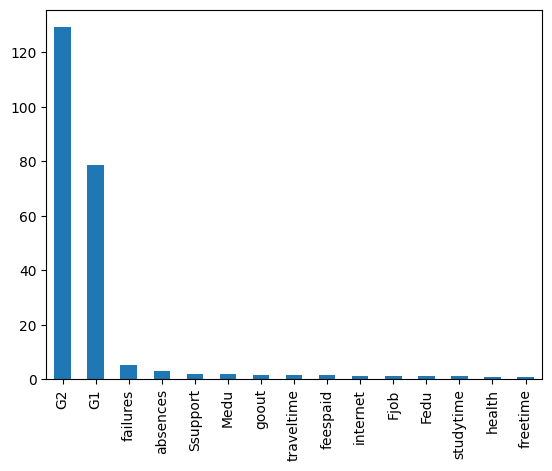

In [170]:
from sklearn.feature_selection import SelectKBest

k_best = SelectKBest(k=15)
k_best.fit(X, y)

df_score = pd.Series(data=k_best.scores_, index=X.columns)
df_score.nlargest(15).plot(kind='bar')

<Axes: >

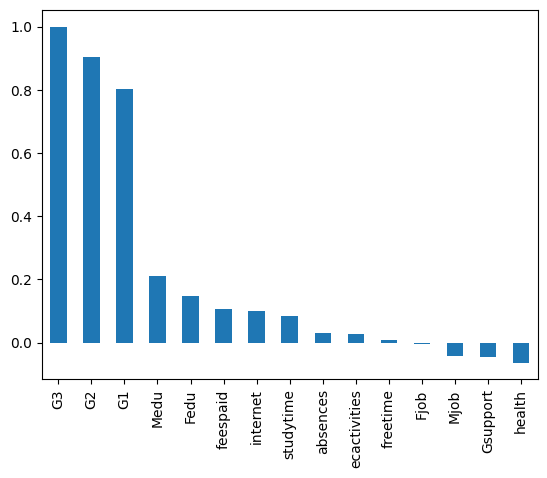

In [171]:
df_corr = data.corr()['G3'].nlargest(15)
df_corr.plot(kind='bar')

In [172]:
final_column = []
for i in df_score.nlargest(15).keys():
    if i in df_corr.keys():
        final_column.append(i)
final_column

['G2',
 'G1',
 'absences',
 'Medu',
 'feespaid',
 'internet',
 'Fjob',
 'Fedu',
 'studytime',
 'health',
 'freetime']

In [173]:
X = data[final_column]
y = data['G3']
X.head()

G2    G1  absences  Medu  feespaid  internet  Fjob  Fedu  studytime  \
0   5.5   5.0       6.0   4.0       0.0       0.0   3.0   4.0        2.0   
1   5.0   5.0       4.0   1.0       0.0       1.0   5.0   1.0        2.0   
2   8.0   7.0      10.0   1.0       1.0       1.0   5.0   1.0        2.0   
3  14.0  15.0       2.0   4.0       1.0       1.0   1.0   2.0        3.0   
4  10.0   6.0       4.0   3.0       1.0       0.0   5.0   3.0        2.0   

   health  freetime  
0     3.0  3.000000  
1     3.0  3.000000  
2     3.0  3.000000  
3     5.0  2.000000  
4     5.0  3.233161

## Splitting data into train and test

In [174]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

k_fold = KFold(n_splits=10, random_state=10, shuffle=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 11), (79, 11), (316,), (79,))

## Machine Learning Algorithm

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [176]:
classifiers = {
    'Linear Regression' : LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
}

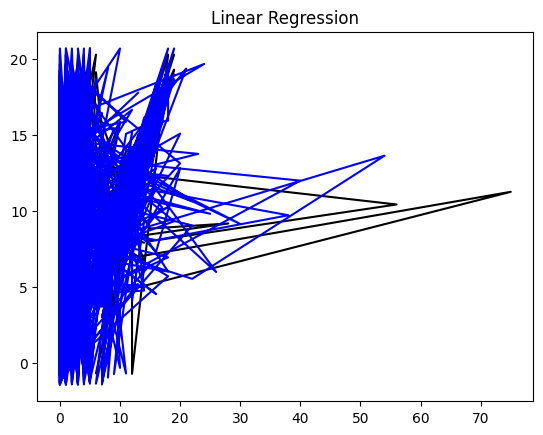

Linear Regression:0.7775284322089051


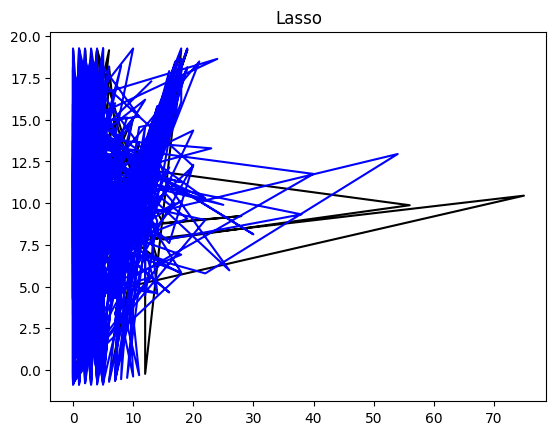

Lasso:0.7893658649896899


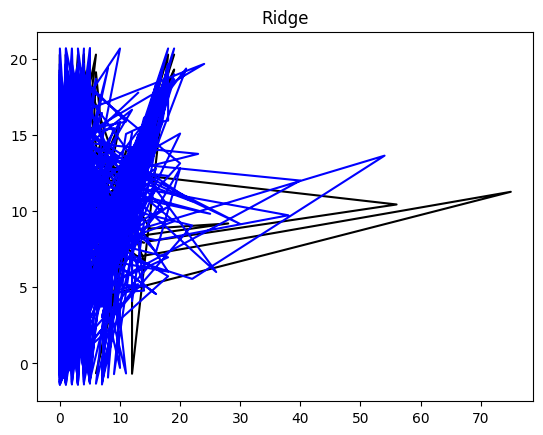

Ridge:0.7776211560570374


<BarContainer object of 3 artists>

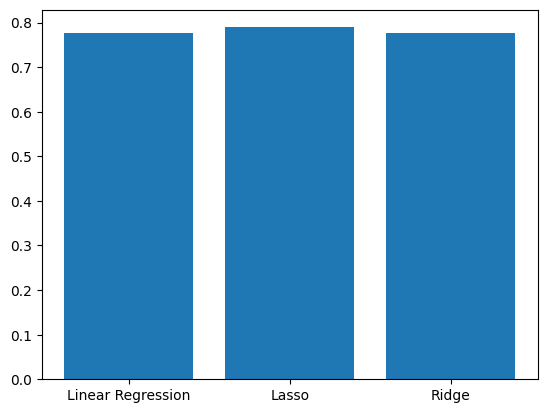

In [186]:
scores = {}
for key, clf in classifiers.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test,y_test)
    plt.plot(X_test, clf.predict(X_test),color='k')
    plt.plot(X_train, clf.predict(X_train),color='b')
    plt.title(f'{key}')
    plt.show()
    scores[key]=score

    print(f'{key}:{score}')
plt.bar(range(len(scores)),list(scores.values()),tick_label=list(scores.keys()))

## K Fold

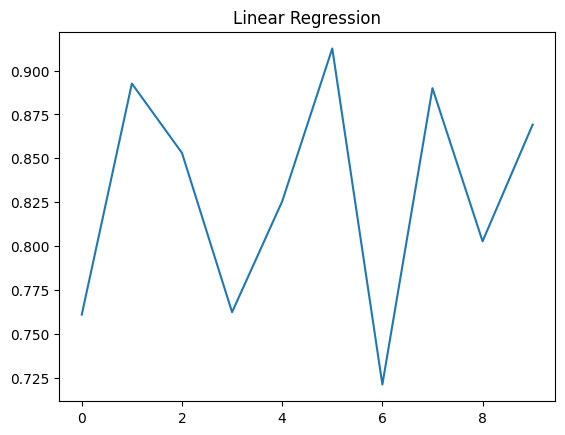

Linear Regression:[0.76088388 0.89258708 0.85303571 0.76227856 0.82540856 0.91257044
 0.72106061 0.88994177 0.80267398 0.86918882]


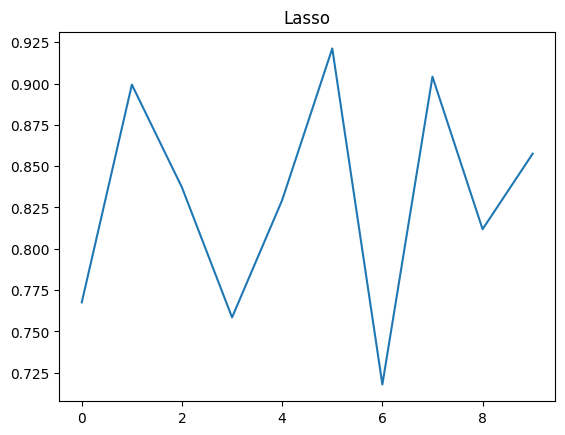

Lasso:[0.76754615 0.89934402 0.83710998 0.75844673 0.82947547 0.92124217
 0.71784578 0.90415485 0.81184807 0.8575364 ]


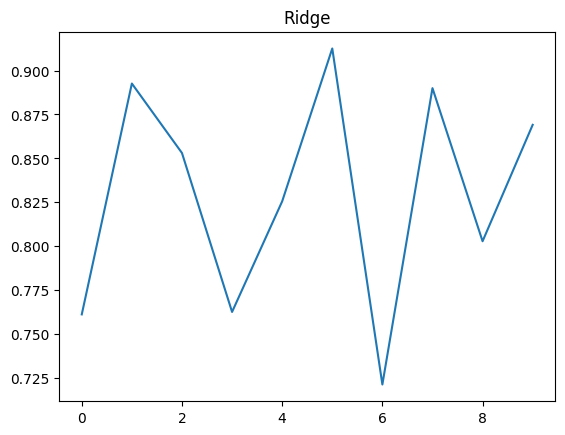

Ridge:[0.76108552 0.89263119 0.85304246 0.76248205 0.82550142 0.91260407
 0.72115129 0.88999941 0.80276676 0.86909348]


In [190]:
for key, clf in classifiers.items():
    #clf.fit(X_train, y_train)
    score = cross_val_score(clf, X_train, y_train, cv=k_fold)
    plt.plot(score)
    plt.title(f'{key}')
    plt.show()
    print(f'{key}:{score}')